## **UMAP GENE PLOTTER**
Script that takes umap coordinates from *AnnData object* to plot:
- **gene expressions**
- **cell fate annotations**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import math
import scanpy as scp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import pandas as pd
import anndata as ad

from sklearn import preprocessing

import os

#import pydpc

In [2]:
adata=scp.read("pijuan_new_annot_raw.h5ad")

In [3]:
adata

AnnData object with n_obs × n_vars = 93513 × 29452
    obs: 'Cell', 'index', 'Sample', 'Stage', 'Stage_numeric', '#Counts', '#Genes', 'mtFraction', 'Scrublet_score', 'Doublet_permissive', 'Doublet_conservative', 'Stripped', 'Doublet_by_cluster', 'Stripped_by_cluster', 'Imputed', 'Louvain_Stage', 'Annotation_Stage'
    var: 'ENS', 'Gene', '#Cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'higly_variable'
    obsm: 'Raw', 'X_pca_Harmony_Stage', 'X_pca_MNN_Stage', 'X_pca_Stage', 'X_umap_Harmony_Stage', 'X_umap_MNN_Stage', 'X_umap_Stage'

### DATASET SUBSETTING

In [4]:
# select timepoint to subset dataframe
stage=8.5
idx_stage = adata.obs.loc[:,"Stage_numeric"]==stage  

### UMAP PLOTTING

In [11]:
# create folder to store plots
os.makedirs("Plots/", exist_ok=True)

In [5]:
## Plotting key selection
representation='X_umap_Stage' # select column with umap coordinates
clustering_algorithm='Gene'# key to cluster umap

gene='Adgrl2' # choose gene to visualize expression

Text(0.5, 1.0, 'Adgrl2_E8.5')

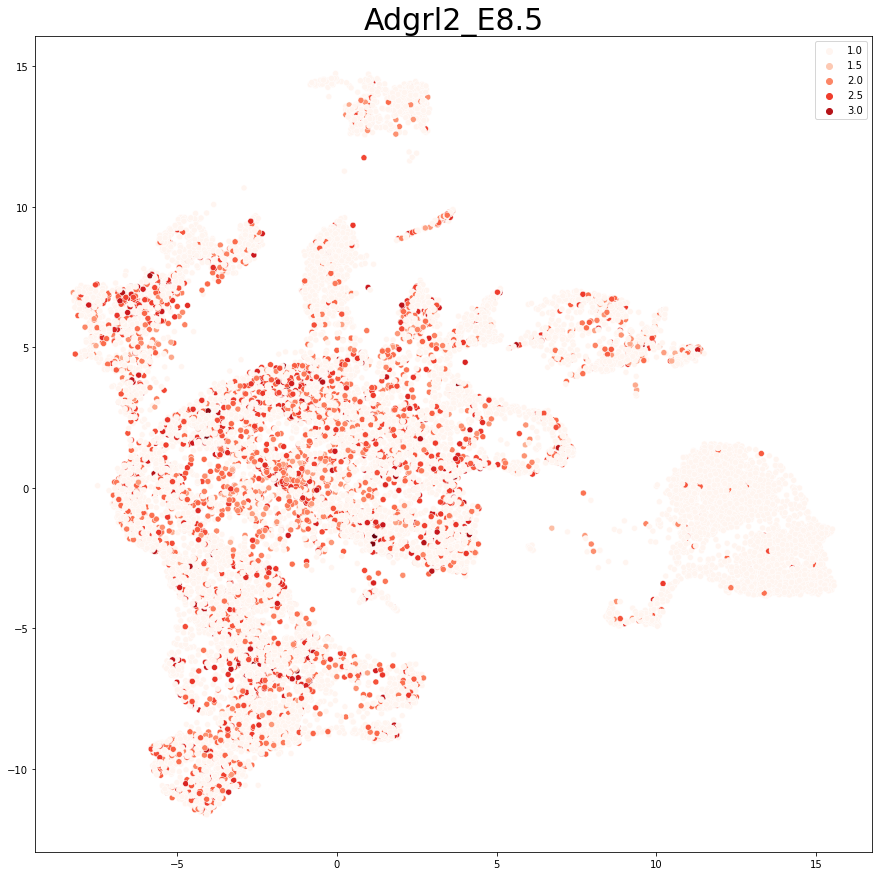

In [20]:
# Plotting just gene expression
# construct plot
fig, ax= plt.subplots(1,1,figsize=(15,15))
sns.scatterplot(
                x=adata.obsm[representation][idx_stage,0],
                y=adata.obsm[representation][idx_stage,1],
                hue = np.array(adata[idx_stage][:,adata.var["Gene"]==gene].X.todense()).reshape(-1)+1,
                palette=("Reds"),
                ax=ax)
                
ax.set_title(gene+"_E"+str(stage),fontsize=30)

# fig.savefig(path)

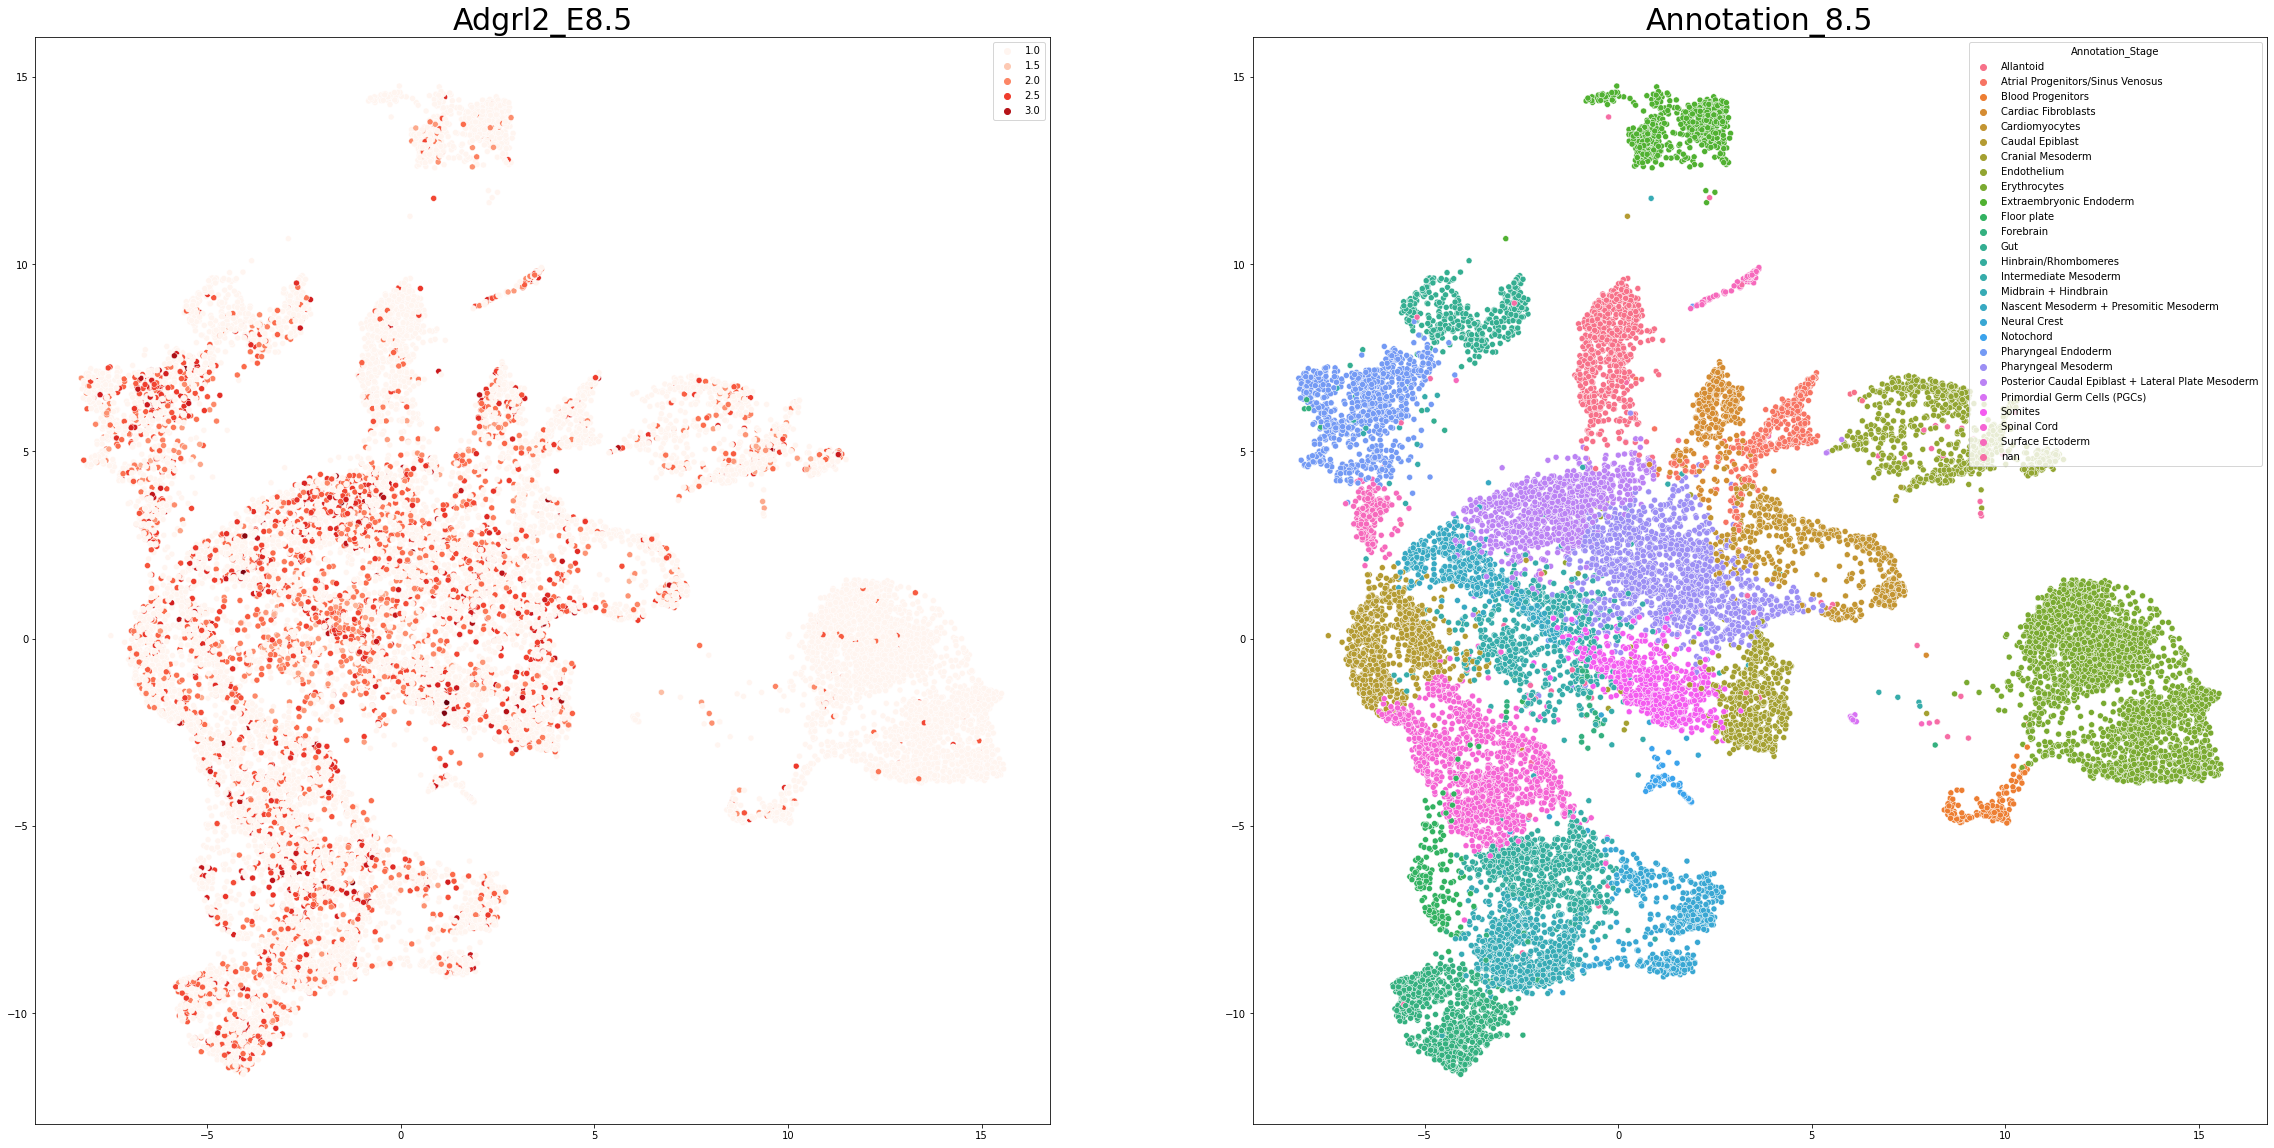

In [17]:
# creating merged plot with gene expression and cluster annotation

fig, ax= plt.subplots(1,2,figsize=(40,20))
sns.scatterplot(
                x=adata.obsm[representation][idx_stage,0],
                y=adata.obsm[representation][idx_stage,1],
                hue = np.array(adata[idx_stage][:,adata.var["Gene"]==gene].X.todense()).reshape(-1)+1,
                palette=("Reds"),
                ax=ax[0])
                
ax[0].set_title(gene+"_E"+str(stage),fontsize=30)

sns.scatterplot(
                x=adata.obsm[representation][idx_stage,0],
                y=adata.obsm[representation][idx_stage,1],
                hue = adata.obs['Annotation_Stage'][idx_stage],
                ax=ax[1])
ax[1].set_title("Annotation_"+str(stage), fontsize=30)

fig.savefig("Plots/UMAP_"+gene+"_E"+str(stage)+".pdf",bbox_inches="tight",transparent=True)